In [1]:
import numpy as np

# Toy dataset: 3 samples, each with 3 features
X = np.array([
    [0.6, 0.2, 0.9],
    [0.1, 0.5, 0.3],
    [0.8, 0.9, 0.4]
])

# True labels, one-hot encoded (3 classes)
y_true = np.array([
    [1, 0, 0],  # class 0
    [0, 1, 0],  # class 1
    [0, 0, 1]   # class 2
])


In [2]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # stability trick
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


In [3]:
def cross_entropy_loss(y_true, y_pred):
    eps = 1e-10  # prevent log(0)
    return -np.mean(np.sum(y_true * np.log(y_pred + eps), axis=1))


In [4]:
np.random.seed(42)
W1 = np.random.randn(3, 4) * 0.1  # input -> hidden
b1 = np.zeros((1, 4))
W2 = np.random.randn(4, 3) * 0.1  # hidden -> output
b2 = np.zeros((1, 3))


In [5]:
learning_rate = 0.1
epochs = 500
losses = []

for epoch in range(epochs):
    # Forward
    z1 = X @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    y_pred = softmax(z2)

    # Loss
    loss = cross_entropy_loss(y_true, y_pred)
    losses.append(loss)

    # Backward
    dloss_dz2 = (y_pred - y_true) / X.shape[0]  # derivative of CE+softmax
    dW2 = a1.T @ dloss_dz2
    db2 = np.sum(dloss_dz2, axis=0, keepdims=True)

    da1 = dloss_dz2 @ W2.T
    dz1 = da1 * relu_derivative(z1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update weights
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Occasionally print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 1.0956
Epoch 100, Loss: 0.8893
Epoch 200, Loss: 0.5129
Epoch 300, Loss: 0.1895
Epoch 400, Loss: 0.0886


In [6]:
print("\nFinal Predictions (probabilities):")
print(np.round(y_pred, 3))

print("\nPredicted Classes:")
print(np.argmax(y_pred, axis=1))



Final Predictions (probabilities):
[[0.981 0.012 0.006]
 [0.056 0.884 0.06 ]
 [0.001 0.021 0.978]]

Predicted Classes:
[0 1 2]


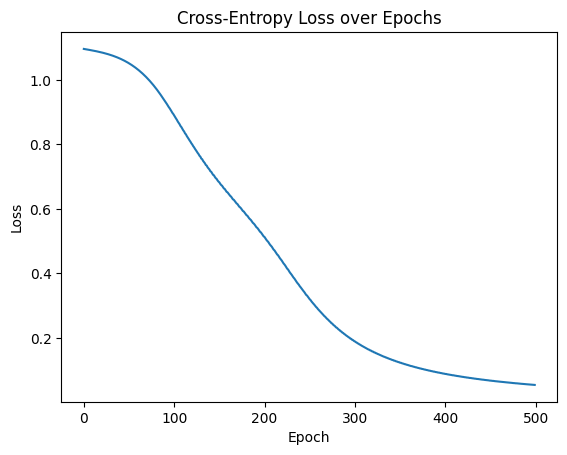

In [7]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title("Cross-Entropy Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


Text(3, 3, 'Hidden Layer\n(3×4)')

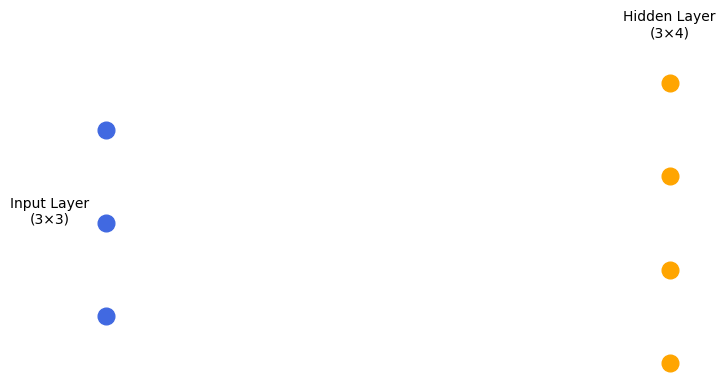

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis("off")

# --- Input layer (3 features) ---
x_positions = [0]*3
y_positions = [2, 1, 0]
for i, y in enumerate(y_positions):
    ax.plot(x_positions[i], y, 'o', color='royalblue', markersize=12)
ax.text(-0.3, 1, "Input Layer\n(3×3)", ha='center', fontsize=10)

# --- Hidden layer (4 neurons, ReLU) ---
hx_positions = [3]*4
hy_positions = [2.5, 1.5, 0.5, -0.5]
for i, y in enumerate(hy_positions):
    ax.plot(hx_positions[i], y, 'o', color='orange', markersize=12)
ax.text(3, 3, "Hidden Layer\n(3×4)", ha='center', fontsize=10)

# --- Output layer (3 neurons, Softm
